In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
#plt.style.use('ggplot')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Check if the data is in correct format/datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- This dataset has total of 891 rows and 12 columns.
- Right away we can see that there are missing values for age, cabin, and few embarked.
- Let's make the missing values even more obvious. 

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Usually this is the perfect time to take care of missing values.
- In this case, we will take care of them as we go.

**Let's take this time to come up with few questions we would like to answer with this data:**
- How many passengers were male and female? 

### How many passengers were male and female?

Text(0.5, 1.0, 'Gender Distribution')

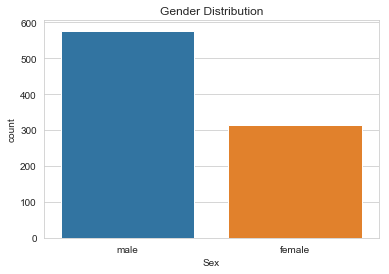

In [5]:
sns.countplot(x='Sex', data=df)

#Give it a title for best practice
plt.title('Gender Distribution')

- There are a lot more males than females.
- Let's see how they distribute by Pclass. 

Text(0.5, 1.0, 'Gender Distribution by Pclass')

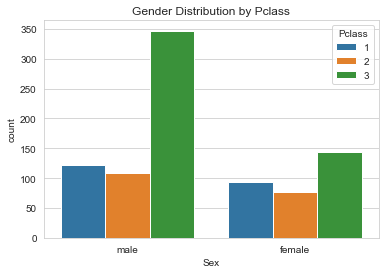

In [6]:
sns.countplot(x='Sex', data=df, hue='Pclass')

#Give it a title for best practice
plt.title('Gender Distribution by Pclass')

- Looks like many people were on third class.
- Surprisingly, more people were on first class than second class. 
- How many of children are in each class?

In [7]:
#Let say a person under the age of 18 is consider a child.
df['Gender_Status'] = df['Age'].apply(lambda x: 'Adult' if x >= 18 else 'Children')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Children
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Children


In [8]:
df['Gender_Status'].value_counts()

Adult       601
Children    290
Name: Gender_Status, dtype: int64

Text(0.5, 1.0, 'Adult and Children Distribution by Pclass')

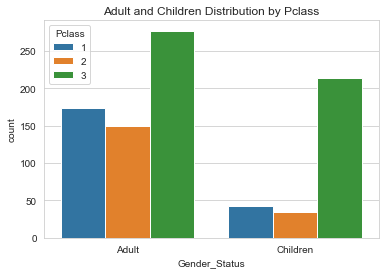

In [9]:
sns.countplot(x='Gender_Status', data=df, hue='Pclass')

#Give it a title for best practice
plt.title('Adult and Children Distribution by Pclass')

- Similar distribution to 'Gender Distribution by Pclass' above.
- Let's check how age is distributed.

Text(0, 0.5, 'Count')

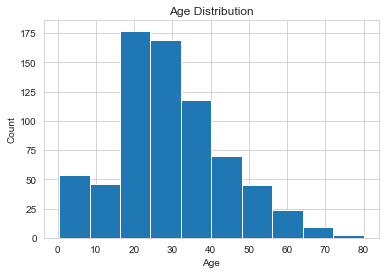

In [10]:
df['Age'].hist()

#Give it a title, x-axis, and y-axis name for best practice
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

- Majority of people are between the age of 20 to 50.
- However, many young adults are on it. 

### Did gender play a role in survival?

In [11]:
df.head()
df.groupby('Sex').Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

Text(0, 0.5, 'Count')

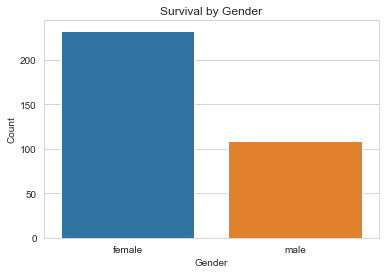

In [12]:
sns.barplot(x=df.groupby('Sex').Survived.sum().index, y=df.groupby('Sex').Survived.sum().values)

#Give it a title, x-axis, and y-axis name for best practice
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

- Gender has definitely played a role in who survived and who did not.
- Females were more likely to survive than males.
- Lets get the survival rate for each gender. 

In [13]:
# To get the survival rate, we have to divide total number of survival for each gender by the total number of each gender.
#Female survival rate
df.groupby('Sex').Survived.sum().values[0]/df.groupby('Sex').Survived.count().values[0]*100

74.20382165605095

In [14]:
#Male survival rate
df.groupby('Sex').Survived.sum().values[1]/df.groupby('Sex').Survived.count().values[1]*100

18.890814558058924

### Did Pclass play a role in survival?

In [15]:
df.groupby(['Pclass','Survived']).Survived.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

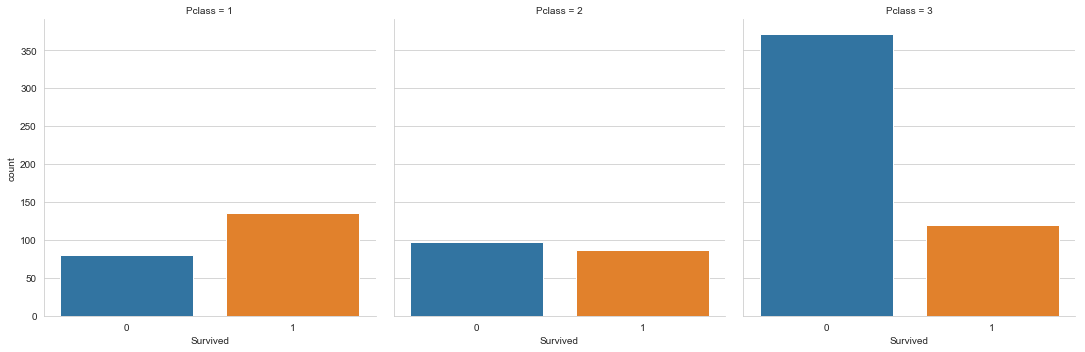

In [16]:
#Survivors by Pclass
sns.catplot('Survived', col='Pclass', data=df, kind='count')

- Pclass did play a role in survival.
- People in Pclass 1 survived the most; followed by Pclass 3.
- Will gender make any differences?

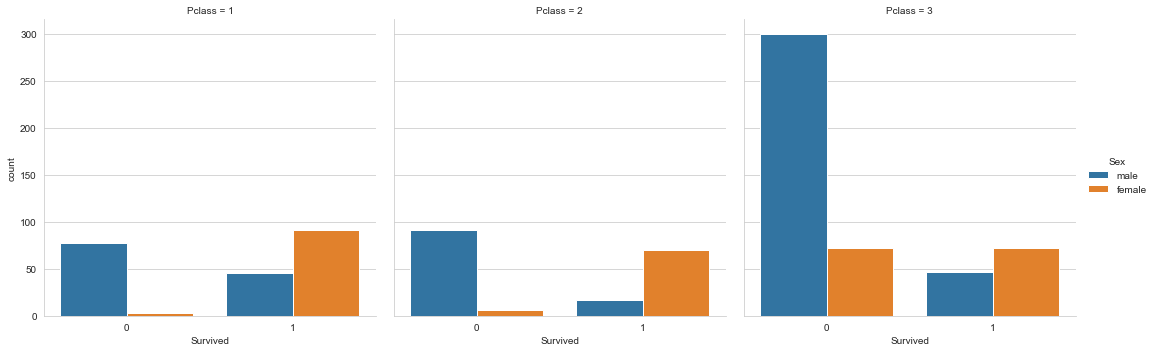

In [17]:
#Survivors by Pclass per Gender
sns.catplot('Survived', col='Pclass', data=df, kind='count', hue='Sex')

- The results are similar, but females in Pclass 3 and 2 are almost equivalent compared to before.
- Lets make sure with actual numbers.

In [18]:
df.groupby(['Pclass','Survived','Sex']).Survived.count()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64

- Interesting thing to note here is that for Pclass 3, exact same number of females survived as those who did not. 
- That is very interesting. 

### Did having sibling or spouse play a role in survival? 

In [19]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

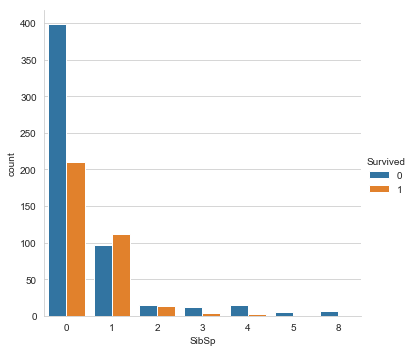

In [20]:
#Survivors by SibSp
sns.catplot('SibSp', data=df, hue='Survived', kind='count')

In [21]:
#Survival rate by SibSp
df.groupby('SibSp').Survived.sum()/df.groupby('SibSp').Survived.count()*100

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

- It does not look like SibSp played a significant role into who survive and who does not. 
- In fact, if you do not have any family members then you are actually less likely to survive than if you had at least one or two family members.

### Are Children more likely to survive than adults?

In [52]:
#Survival rate for adult and children
df.groupby('Gender_Status').Survived.sum()/df.groupby('Gender_Status').Survived.count()*100

Gender_Status
Adult       38.103161
Children    38.965517
Name: Survived, dtype: float64

- We might have assumed that children might have higher survival rate because we as human want to protect childrens. 
- Surprisingly, adult and children had almost similar survival rate.

## Conclusions
By doing exploratory analysis of Titanic dataset we can conclude that, gender played a big role into who survive and who does not. In fact, female had 74 percent chance of surviving compared to 19 percent for male. Another factor was Pclass, which is the ticket class. There were three classes we had to analyze. We found that people in 3rd class had the highest chance of surviving followed by 1st and 2nd class. 